# 线性回归 Linear Regression

# 预测宝可梦进化后的CP值
<div style="width:600px">
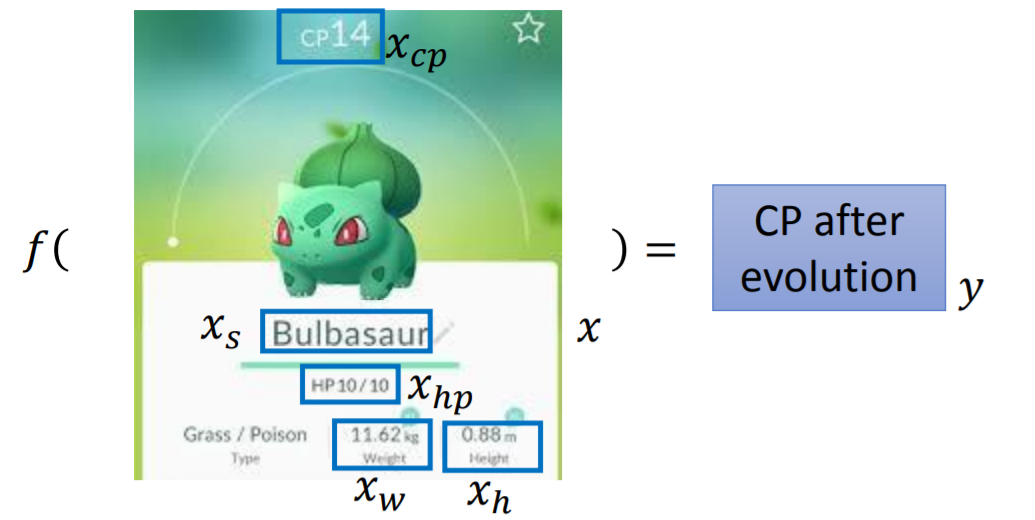
</div>





对于该问题，标签 $y$ 为进化后的CP值，特征 $x$ 如上图，$ x: x_{cp},x_{hp},x_s,x_w,x_h,...$。

假定我们只考虑当前CP值 $x_{cp}$，训练集有10个数据

<div style="width:600px">
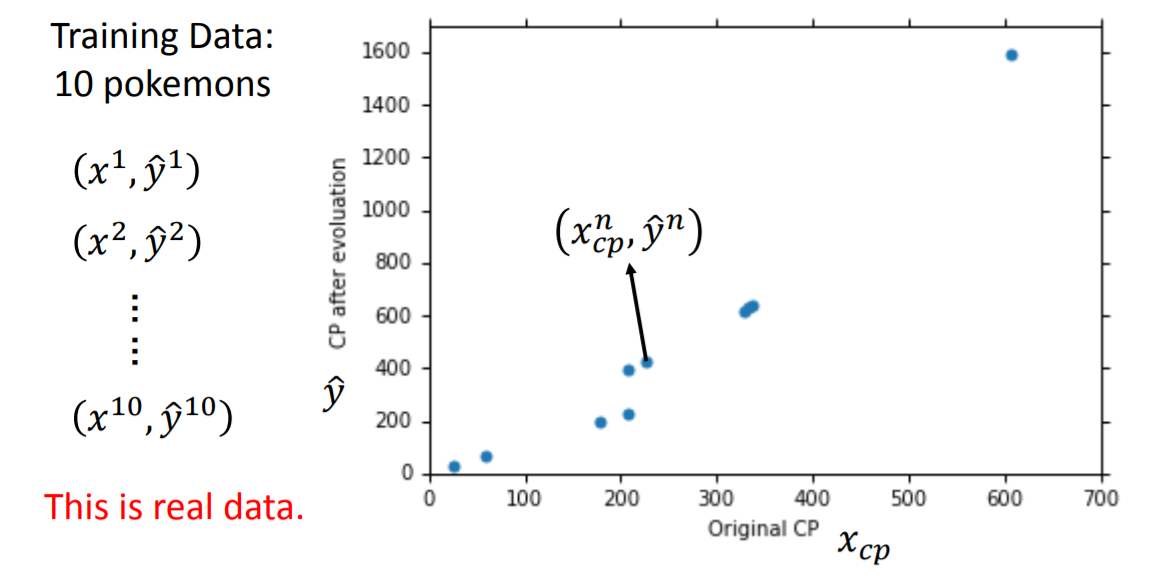
</div>


## 第一步：准备模型

采用最基本的线性模型 $ y = b + \Sigma w_i x_i $ , 

将当前的CP值作为输入，则函数集合为 $ y = f(x) = b + w \cdot x_{cp}$ $,  w,b \in R $

$ w $为权重weight，$b$ 为偏置bias。


<div style="width:600px">
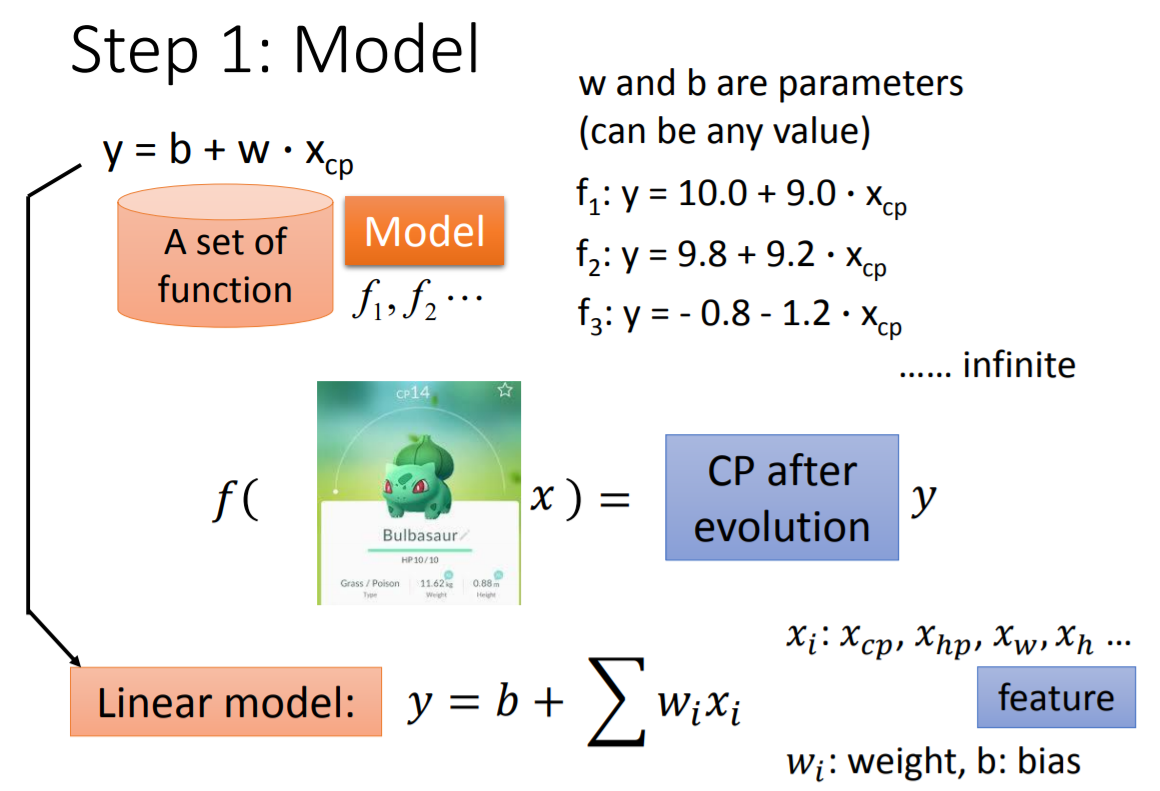
    </div>

## 第二步：评价模型的优劣

### 损失

损失是对糟糕预测的惩罚。也就是说，损失是一个数值，表示对于单个样本而言模型预测的准确程度。
如果模型的预测完全准确，则损失为零，否则损失会较大。训练模型的目标是从所有样本中找到一组平均损失“较小”的权重和偏差。
例如，下图图左侧显示的是损失较大的模型，右侧显示的是损失较小的模型。关于此图，请注意以下几点：
    
    红色箭头表示损失。
    蓝线表示预测。

<div style="width:600px">
    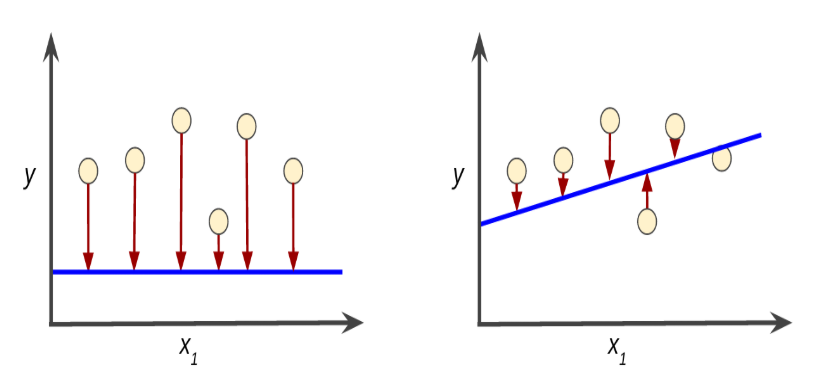
</div>

### 回归本题
对模型 $f$ ，定义损失函数 $Loss(f)$，之后简写为 $L(f)$。

训练集中有10个数据，我们定义损失为这10个数据的预测值和真实值的差值的平方和，即<strong>平方损失</strong>。

在训练过程中，$L(f)$的值越小，说明模型 $f$ 更优。

<div style="width:600px">
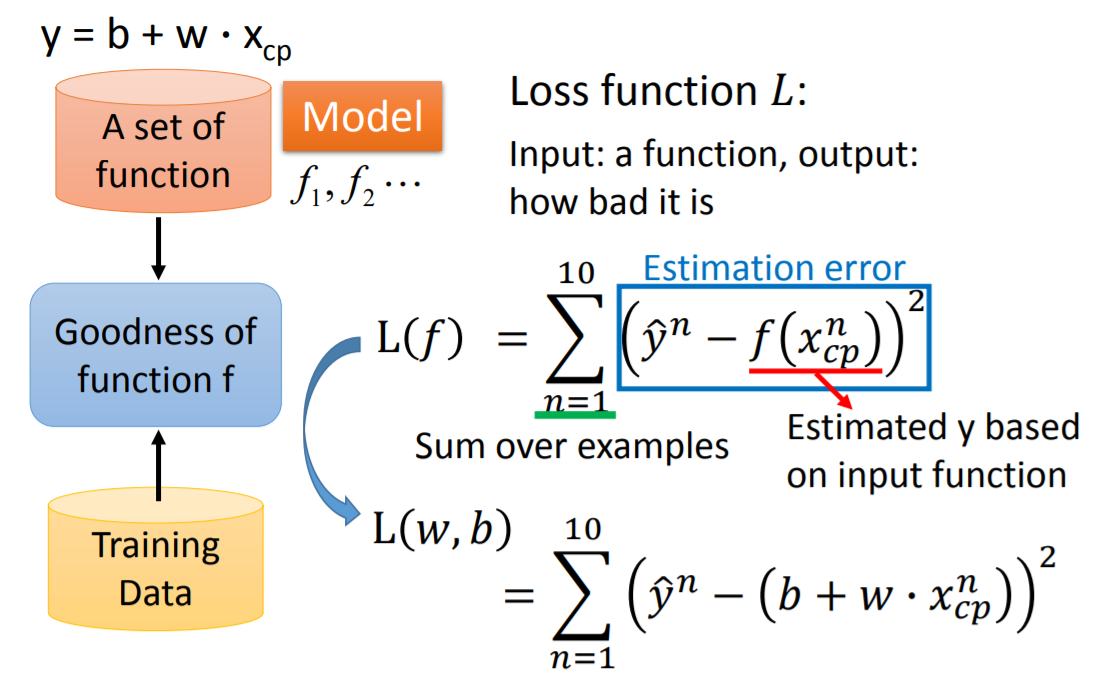
</div>

## 第三步：找出最好的模型

对于该问题，确定$f$就是要找出使损失$L(f)$最小的$w$和$b$。

如何快速找出最佳的$w$和$b$，最直接的做法就是确认一个最小步数（精度）和初始点，不断枚举计算损失，但是这个做法效率低下。更好的做法是梯度下降法快速找到最优值。

### 梯度下降 Gradient Descent

简单理解请参考 https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent
<div style="width:600px">
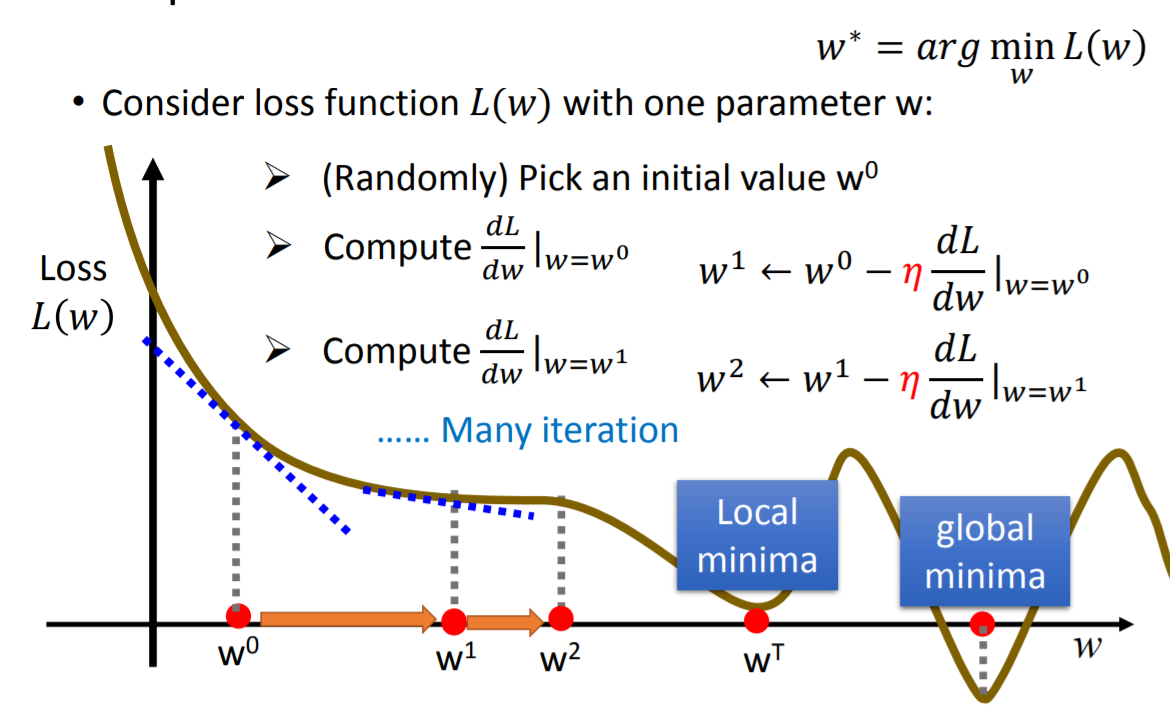
    </div>

## 结果

$w = 2.7,b = -188.4$

训练集上的平均误差 $ =  \Sigma_{n=1}^{10} e^n / 10 = 31.9 $
<div style="width:600px">
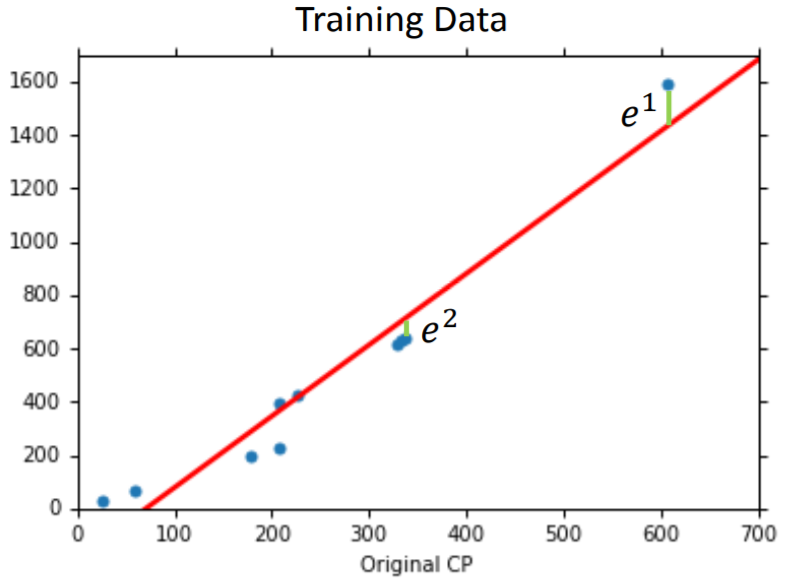
    </div>


# 过拟 Overfitting

在上述的基础之上，我们加入10个数据大小的测试集。

我们选择这5个复杂程度递增的模型：

$ y = b + w_1 \cdot x_{cp} $

$ y = b + w_1 \cdot x_{cp} + w_2 \cdot (x_{cp})^2 $

$ y = b + w_1 \cdot x_{cp} + w_2 \cdot (x_{cp})^2 + w_3 \cdot (x_{cp})^3$

$ y = b + w_1 \cdot x_{cp} + w_2 \cdot (x_{cp})^2 + w_3 \cdot (x_{cp})^3 + w_4 \cdot (x_{cp})^4$

$ y = b + w_1 \cdot x_{cp} + w_2 \cdot (x_{cp})^2 + w_3 \cdot (x_{cp})^3 + w_4 \cdot (x_{cp})^4 + w_5 \cdot (x_{cp})^5$
   
其在训练集和测试集上的误差如下
<div style="width:600px">
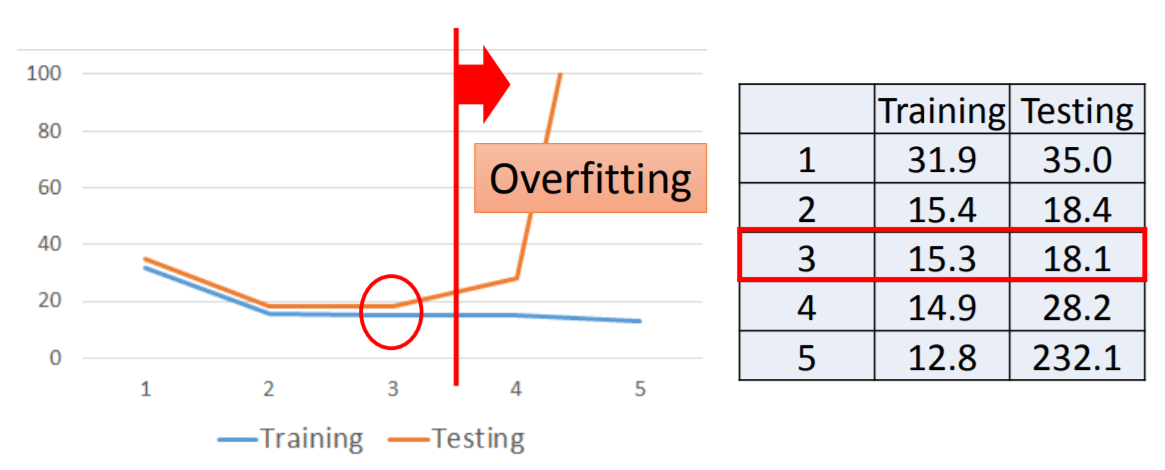
     </div>
     
因此，可以得出结论：<strong>越复杂的模型往往不会使得其在测试集上有更好的效果。</strong>

# 解决过拟的方法之一：正则化 Regularization

正则化：通过降低复杂模型的复杂度来防止过拟合。

也就是说，并非只是以最小化损失（经验风险最小化）为目标：
$$ minimize(Loss(Data|Model)) $$
而是以最小化损失和复杂度为目标，这称为结构风险最小化：
$$ minimize(Loss(Data|Model) + \lambda \cdot complexity(Model)) $$
现在，我们的训练优化算法是一个由两项内容组成的函数：一个是损失项，用于衡量模型与数据的拟合度，另一个是正则化项，用于衡量模型复杂度。($ \lambda $ 可以理解为对模型复杂性的重视程度)

我们可以使用 L2 正则化公式来量化复杂度，该公式将正则化项定义为所有特征权重的平方和：
$$ L_2\text{ regularization term} = ||\boldsymbol w||_2^2 = {w_1^2 + w_2^2 + ... + w_n^2} $$

模型的复杂度越小，模型更不容易去拟合数据中的噪点，函数的曲线会更加平滑。

对于预测进化后的CP值这一问题，加入正则化后效果如下，可以看出在$ \lambda = 100$时效果最佳。
<div style="width:600px">
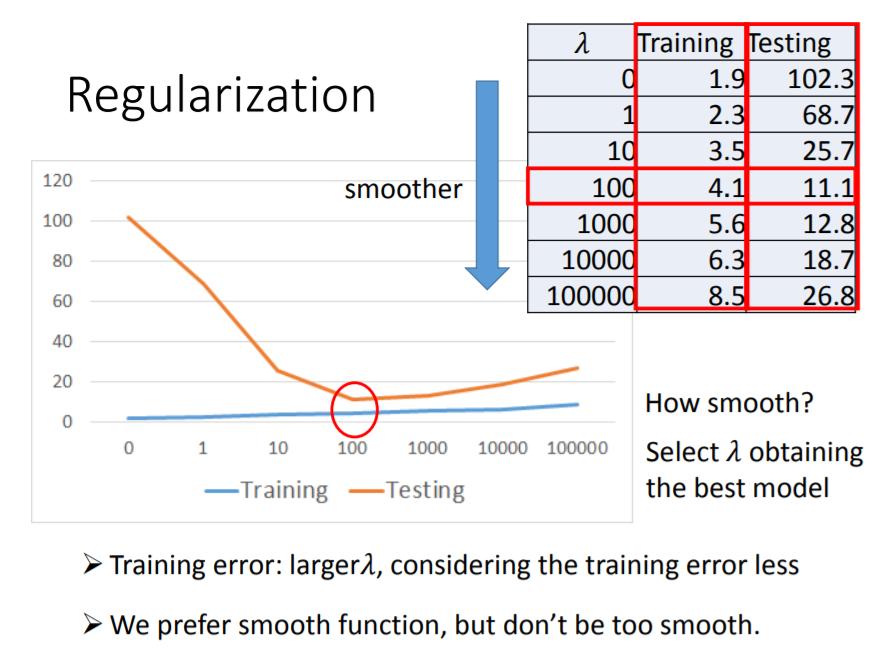